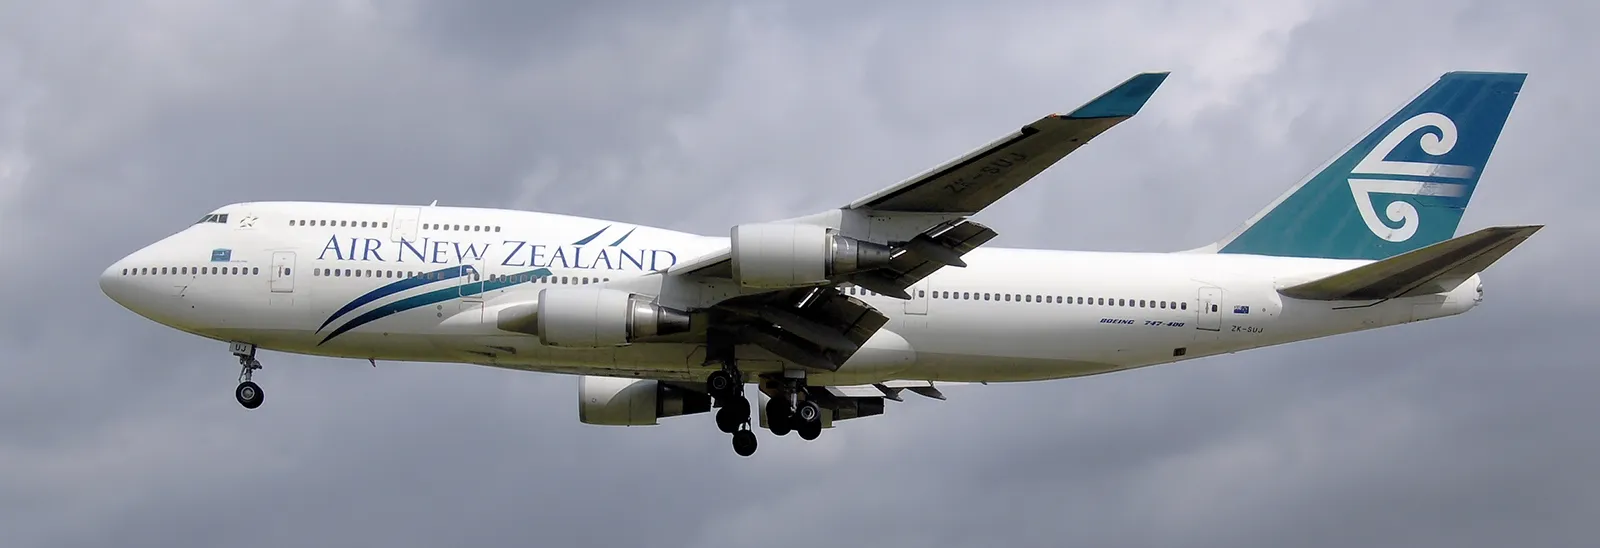

<center><h2 style='font-family:monospace;'>FLIGHT FARE PREDICTION USING ML 🛫🛫</h2></center>
<center>Dataset Link <br><a 'https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/'>Flight Fare Prediction MH</a></center>

<h3>Problem Statement</h3>
<p style='font-family:Verdana;'>
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records
</p>

#### Columns

* Size of test set: 2671 records
* FEATURES: Airline: The name of the airline.
* Date_of_Journey: The date of the journey
* Source: The source from which the service begins.
* Destination: The destination where the service ends.
* Route: The route taken by the flight to reach the destination.
* Dep_Time: The time when the journey starts from the source.
* Arrival_Time: Time of arrival at the destination.
* Duration: Total duration of the flight.
* Total_Stops: Total stops between the source and destination.
* Additional_Info: Additional information about the flight

* Price: The price of the ticket   

> Predict The Flight Fare Based On User Ticket Details.

### https://flight-price-predictionmlapp.herokuapp.com/

https://github.com/sarthakkmishraa/Flight-Price-Prediction-With-Deployment/blob/main/app.py

### Combine Airline 
```
Airline_Trujet	0.016651
Airline_Multiple carriers Premium economy	0.002402
Airline_Jet Airways Business	0.001607
Airline_Vistara Premium economy	0.000000
```
Into Others

## Workflow To Be Followed

<p style='font-family:Verdana;'>
Step 1: Loading The Dataset <br>
Step 2: Performing EDA <br>
Step 3: Feature Engineering <br>
Step 4: Model Training & Evaluation <br>
Step 5: Testing The Model On New Data. <br>

</p>    

## STEP 1: Loading Dataset

https://github.com/Mandal-21/Flight-Price-Prediction/blob/master/flight_price.ipynb

In [1]:
## Basic Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
dark = sns.color_palette('dark')
bright = sns.color_palette('bright')
deep = sns.color_palette('deep')
pastel = sns.color_palette('pastel')

plt.style.use("seaborn-dark")

import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load The Dataset
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
## Load The Test Data
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_test.shape

(2671, 10)

## STEP 2: EDA

#### Basic EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# A Random Sample From The Data
df.sample(8)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6542,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,18:15 02 Apr,25h 45m,1 stop,In-flight meal not included,7064
10515,Air India,3/04/2019,Banglore,Delhi,BLR → DEL,10:00,12:45,2h 45m,non-stop,No info,5176
6970,Jet Airways,27/05/2019,Delhi,Cochin,DEL → BOM → COK,17:30,12:35 28 May,19h 5m,1 stop,In-flight meal not included,12898
5702,SpiceJet,27/06/2019,Banglore,Delhi,BLR → DEL,21:10,00:05 28 Jun,2h 55m,non-stop,No check-in baggage included,4319
1738,Air India,27/05/2019,Delhi,Cochin,DEL → BLR → COK,17:40,09:35 28 May,15h 55m,1 stop,No info,7258
4596,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,21:50,12:35 25 Jun,14h 45m,1 stop,In-flight meal not included,10262
7747,Multiple carriers,9/03/2019,Delhi,Cochin,DEL → BOM → COK,06:50,19:15,12h 25m,1 stop,In-flight meal not included,14817
416,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 13 May,12h 10m,1 stop,No info,14388


In [8]:
## Missing Values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Analysis

Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

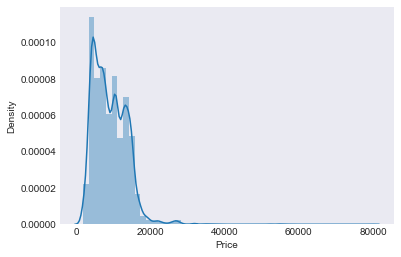

In [9]:
sns.distplot(df['Price'])

In [10]:
## Flight Price Higher Than 50000
df[df.Price>40000]['Price'].count()

9

In [11]:
## Flight Price Lesser Than 2000
df[df.Price<2000]['Price'].count()

41

plotting all nominal categorical columns

In [12]:
nominal_categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()<15]
nominal_categorical_columns

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

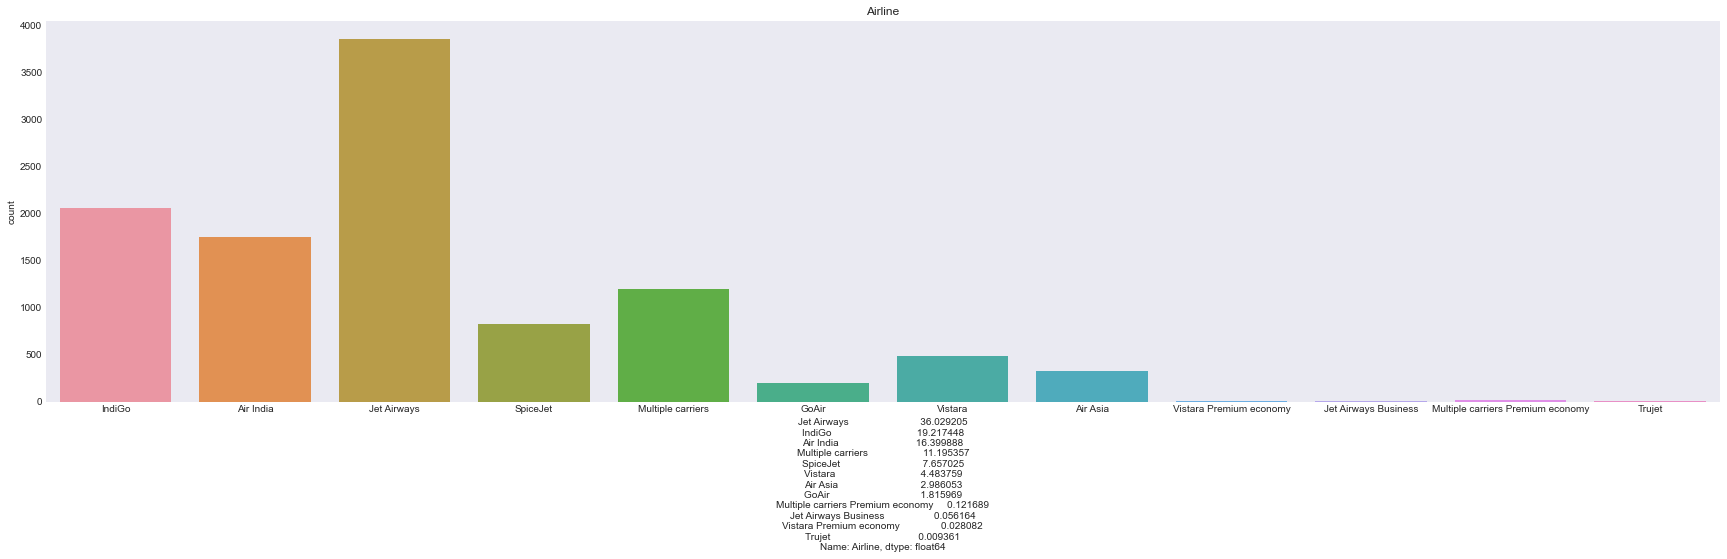

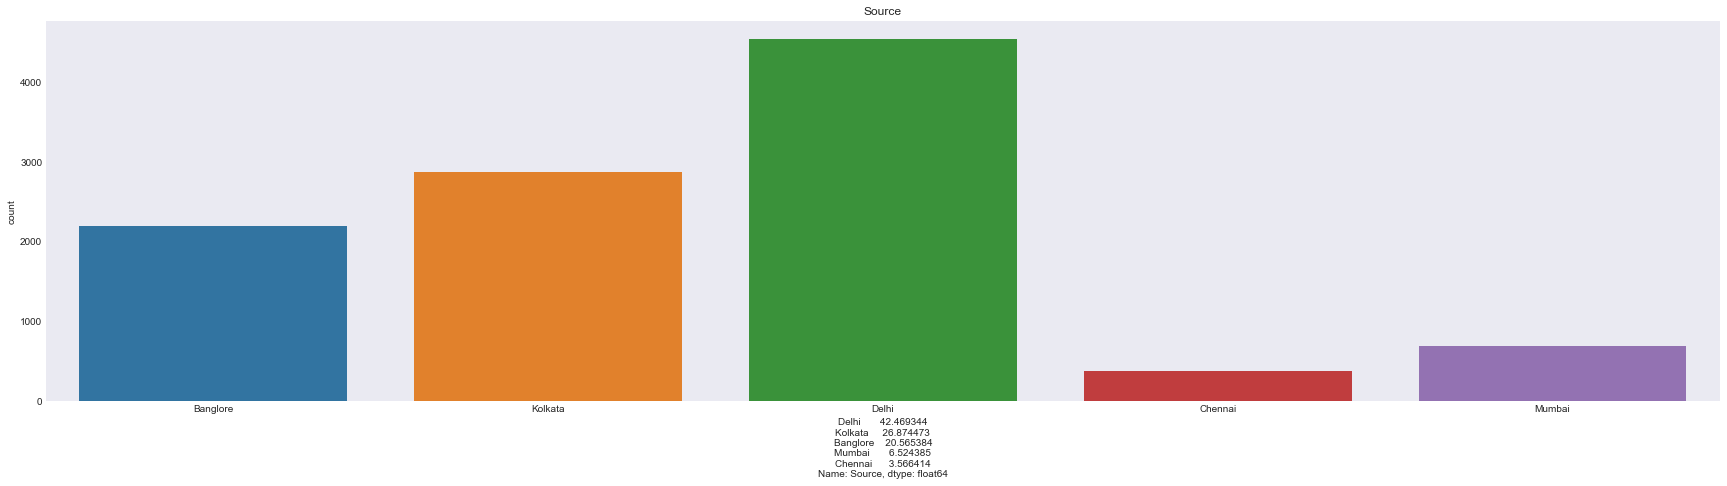

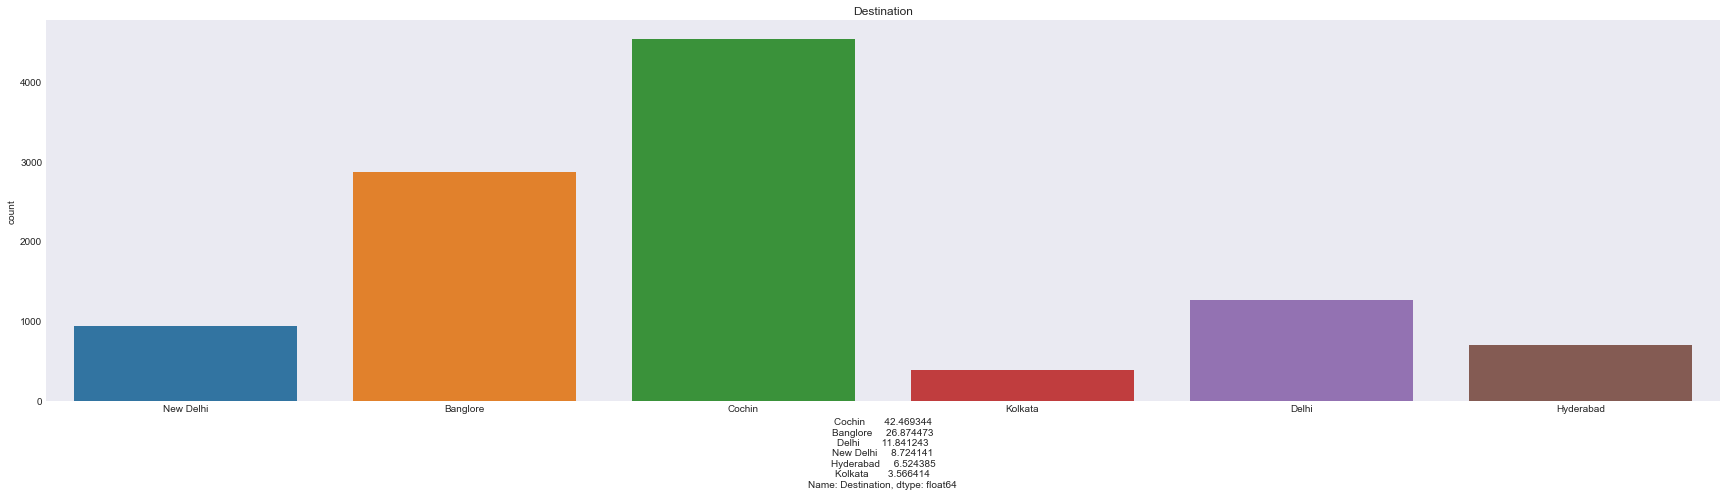

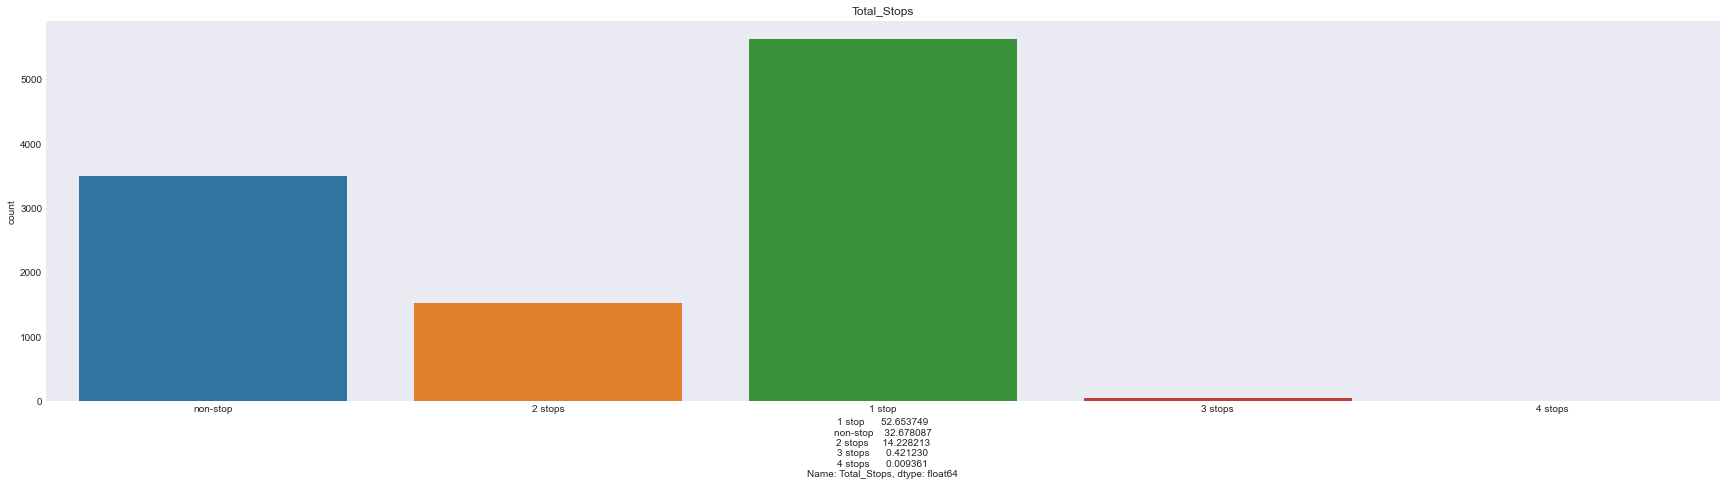

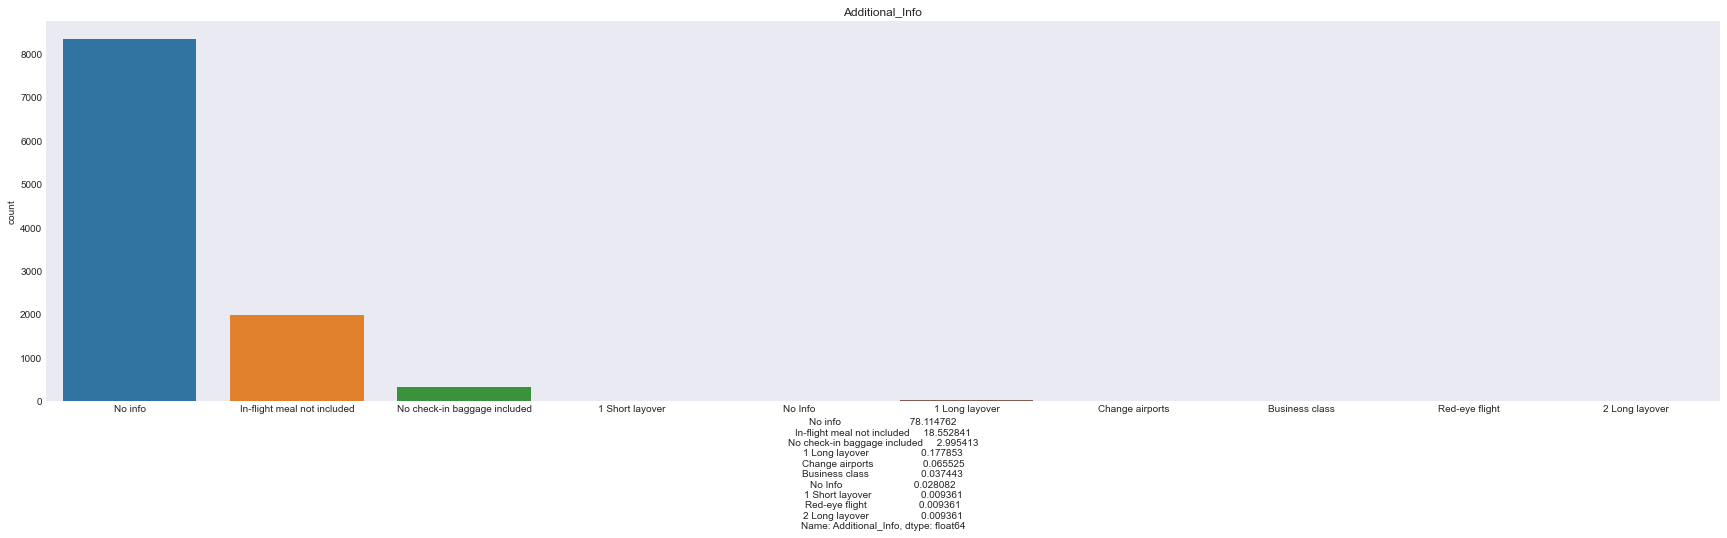

In [13]:
for col in nominal_categorical_columns:
    plt.figure(figsize=(30,7))
    ax = sns.countplot(col,data=df)
    ax.bar_label(ax.containers[0])
    labels = (df[col].value_counts() / len(df))*100
    plt.title(col)
    plt.xlabel(f'{labels}')
    plt.show()

Plotting Ordinal Categorical Columns

In [14]:
ordinal_categorical_columns = [feature for feature in df.columns if df[feature].dtype=='O' and df[feature].nunique()>15]
ordinal_categorical_columns

['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration']

Date_of_Journey

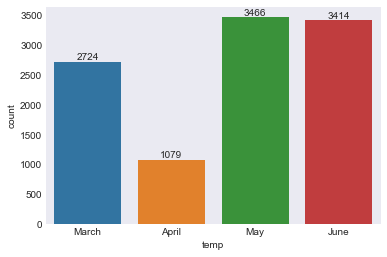

In [15]:
## Number of Flights On Different Months
from datetime import date
df['temp'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
ax = sns.countplot(df['temp'].dt.month)
labels = ['March','April','May','June']
ax.bar_label(ax.containers[0])
ax.set_xticklabels(labels);
df.drop('temp',axis=1,inplace=True)

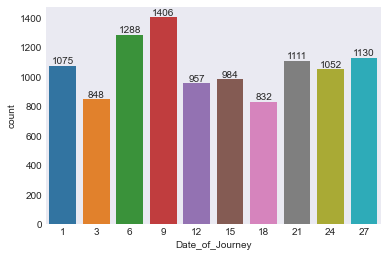

In [16]:
## Number of Flights On Particular Day of Different Months
from datetime import date
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
ax = sns.countplot(df['Date_of_Journey'].dt.day)
ax.bar_label(ax.containers[0]);

Dep_Time

In [17]:
df['Dep_Time'].head()

0    22:20
1    05:50
2    09:25
3    18:05
4    16:50
Name: Dep_Time, dtype: object

<AxesSubplot:xlabel='Dep_Time'>

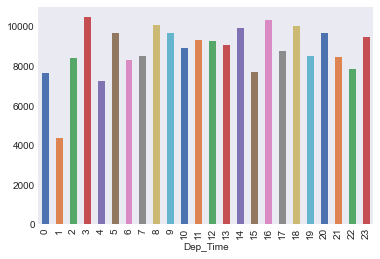

In [18]:
## The Average Price of Flights Based on Their Departure Time
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df.groupby(df['Dep_Time'].dt.hour)['Price'].mean().plot.bar(color=deep)

#### Airline

In [19]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

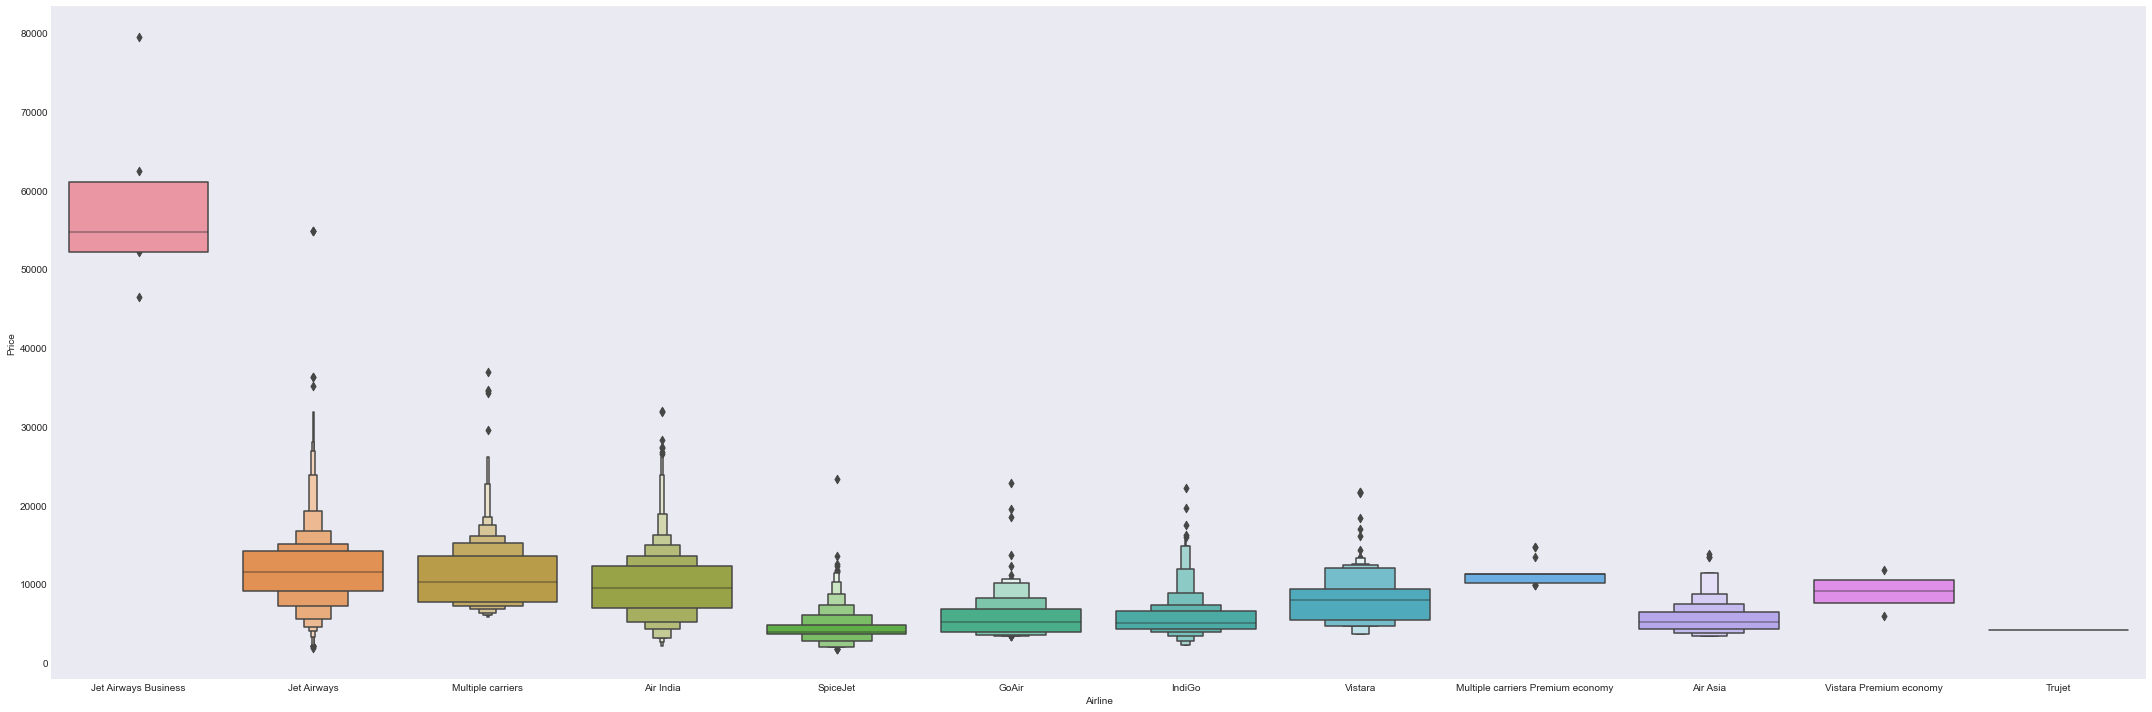

In [20]:
sns.catplot(y = "Price", x = "Airline", data =df.sort_values("Price", ascending = False), kind="boxen", height = 10, aspect = 3)
plt.show()

All Airline median value is almost same except Jet Airways.

#### Date_of_journey

In [21]:
df['Date_of_Journey'].unique(),df['Date_of_Journey'].nunique()

(array(['2019-03-24T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
        '2019-06-09T00:00:00.000000000', '2019-05-12T00:00:00.000000000',
        '2019-03-01T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
        '2019-03-12T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
        '2019-06-01T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
        '2019-05-09T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
        '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
        '2019-06-12T00:00:00.000000000', '2019-03-06T00:00:00.000000000',
        '2019-03-21T00:00:00.000000000', '2019-04-03T00:00:00.000000000',
        '2019-05-06T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
        '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
        '2019-04-06T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
        '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
        '2019-06-03T00:00:00.000000000

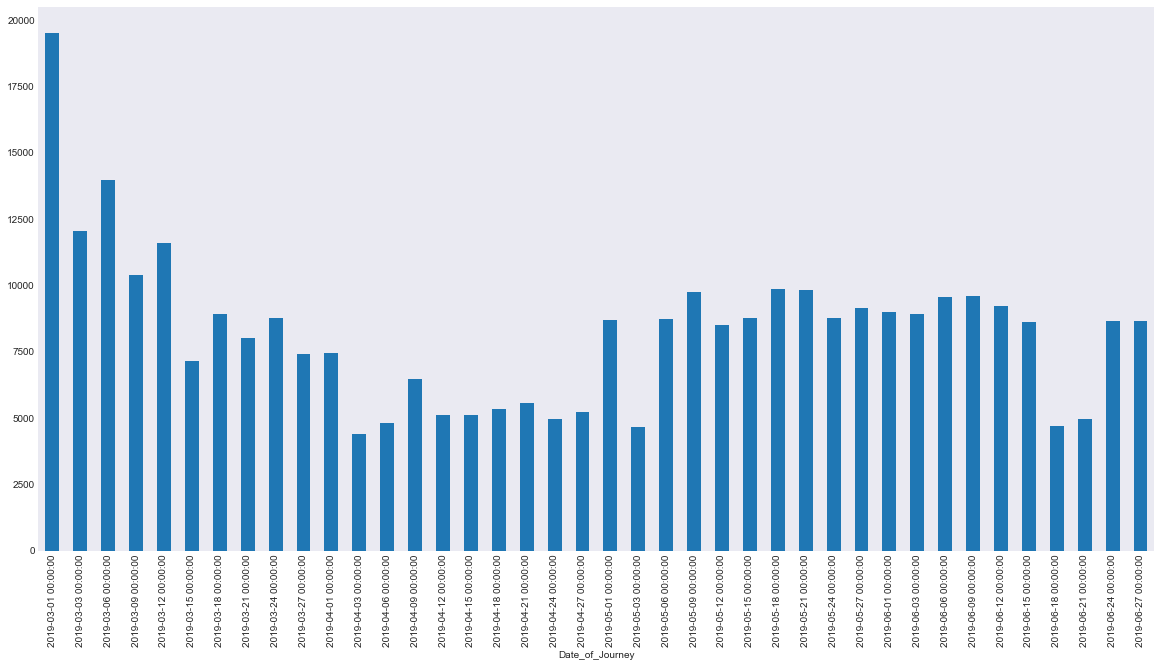

In [22]:
## Average Flight Price Value On Different Date of Journey
df.groupby('Date_of_Journey')['Price'].mean().plot.bar(figsize=(20,10));

In [23]:
## Maximum Flight Fare and Minimum Flight Fare
max_fare = df[df['Price']==df['Price'].max()][['Date_of_Journey','Price','Airline','Route','Duration']]
max_fare

,Date_of_Journey,Price,Airline,Route,Duration
2924,2019-03-01,79512,Jet Airways Business,BLR → BOM → DEL,5h 40m


In [24]:
## Minimum Flight Fare
min_fare = df[df['Price']==df['Price'].min()][['Date_of_Journey','Price','Airline','Route','Duration']]
min_fare

,Date_of_Journey,Price,Airline,Route,Duration
4066,2019-03-21,1759,SpiceJet,BOM → HYD,1h 25m
4274,2019-03-27,1759,SpiceJet,BOM → HYD,1h 25m
4839,2019-04-03,1759,SpiceJet,BOM → HYD,1h 30m
10513,2019-03-27,1759,SpiceJet,BOM → HYD,1h 20m


#### Source

In [25]:
## All Unique Source Values
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

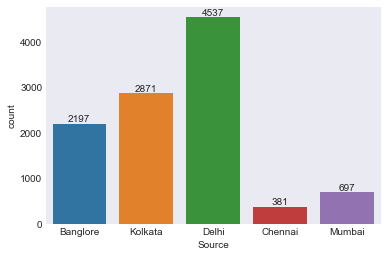

In [26]:
## Number of Flights From Each Source
ax = sns.countplot(data=df,x='Source')
ax.bar_label(ax.containers[0]);

In [27]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 918.2+ KB


## STEP 3: FEATURE ENGINEERING

##### Date_of_Journey, 'Dep_Time', 'Arrival_Time'

In [29]:
## Convert and Extract Day & Month
def extract_day_and_month(data,col):
    df[col]=pd.to_datetime(df[col])
    data[col+'_Date'] = data[col].dt.day
    data[col+'_Month'] = data[col].dt.month
    
## Convert and Extract Hour & Minute
def extract_hour_and_minute(data,col):
    df[col]=pd.to_datetime(df[col])
    data[col+'_Hour']=data[col].dt.hour
    data[col+'_Min']=data[col].dt.minute

In [30]:
## Date_of_Journey
extract_day_and_month(df,'Date_of_Journey')

## Arrival Time
extract_hour_and_minute(df,'Arrival_Time')

## Dep Time
extract_hour_and_minute(df,'Dep_Time')

df.drop(['Date_of_Journey','Arrival_Time','Dep_Time'], axis=1, inplace=True)

In [31]:
# ## One More Way (Without Converting Into DateTime)

# # Date_of_Journey
# df["Day"]=(df['Date_of_Journey'].apply(lambda x:x.split("/")[0])).astype(int)
# df["Month"]=(df['Date_of_Journey'].apply(lambda x:x.split("/")[1])).astype(int)

# # Arrival_Time
# arrival_time = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
# df['Arrival_hour'] = arrival_time.apply(lambda x:x.split(':')[0]).astype(int)
# df['Arrival_minute'] = arrival_time.apply(lambda x:x.split(':')[1]).astype(int)

# # Dep_Time
# df['Dep_hour'] = df['Dep_Time'].apply(lambda x:x.split(":")[0]).astype(int)
# df['Dep_minute'] = df['Dep_Time'].apply(lambda x:x.split(":")[1]).astype(int)

In [32]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Airline                10683 non-null  object
 1   Source                 10683 non-null  object
 2   Destination            10683 non-null  object
 3   Route                  10682 non-null  object
 4   Duration               10683 non-null  object
 5   Total_Stops            10682 non-null  object
 6   Additional_Info        10683 non-null  object
 7   Price                  10683 non-null  int64 
 8   Date_of_Journey_Date   10683 non-null  int64 
 9   Date_of_Journey_Month  10683 non-null  int64 
 10  Arrival_Time_Hour      10683 non-null  int64 
 11  Arrival_Time_Min       10683 non-null  int64 
 12  Dep_Time_Hour          10683 non-null  int64 
 13  Dep_Time_Min           10683 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


##### Route

In [34]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


##### Duration

In [35]:
def handle_single_duration_data(df,col):
    for i in range(len(df[col])):
        if 'h' not in df[col][i]:
            df[col][i] = "0h "+str(df[col][i])
        elif 'm' not in df[col][i]:
            df[col][i] = str(df[col][i])+" 0m"



def extract_hour_from_duration(val):
    return val.split(' ')[0][0:-1]

def extract_minutes_from_duration(val):
    return val.split(' ')[1][0:-1]

In [36]:
handle_single_duration_data(df,'Duration')

In [37]:
df['Duration_Hour'] = df['Duration'].apply(extract_hour_from_duration)
df['Duration_Minute'] = df['Duration'].apply(extract_minutes_from_duration)

In [ ]:
df['Duration_Hour'] = df['Duration_Hour'].astype(int)
df['Duration_Minute'] = df['Duration_Minute'].astype(int)

In [38]:
df.drop('Duration',axis=1,inplace=True)

#### Total_Stops

In [39]:
df['Total_Stops'].head()

0    non-stop
1     2 stops
2     2 stops
3      1 stop
4      1 stop
Name: Total_Stops, dtype: object

In [40]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [41]:
df.Total_Stops.isna().sum()

1

In [42]:
#drop the nullvalues
df.dropna(inplace=True)

In [43]:
df.Total_Stops.isna().sum()

0

In [44]:
df['Total_Stops']=df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}).astype(int)

In [45]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,21,35,16,50,4,45


#### Categorical Columns

##### Additional_Info	

In [46]:
df['Additional_Info'].unique(),df['Additional_Info'].nunique()

(array(['No info', 'In-flight meal not included',
        'No check-in baggage included', '1 Short layover', 'No Info',
        '1 Long layover', 'Change airports', 'Business class',
        'Red-eye flight', '2 Long layover'], dtype=object),
 10)

In [47]:
df['Additional_Info'] = df['Additional_Info'].str.replace('No Info','No info')

In [48]:
df['Additional_Info'].unique(),df['Additional_Info'].nunique()

(array(['No info', 'In-flight meal not included',
        'No check-in baggage included', '1 Short layover',
        '1 Long layover', 'Change airports', 'Business class',
        'Red-eye flight', '2 Long layover'], dtype=object),
 9)

In [49]:
Additional_Info = df[['Additional_Info']]
Additional_Info = pd.get_dummies(Additional_Info,drop_first=True)
Additional_Info

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,1,0
10679,0,0,0,0,0,0,1,0
10680,0,0,0,0,0,0,1,0
10681,0,0,0,0,0,0,1,0


##### Airline

In [50]:
df['Airline'].head()

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
Name: Airline, dtype: object

In [51]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [52]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


##### Source

In [53]:
df['Source'].head()

0    Banglore
1     Kolkata
2       Delhi
3     Kolkata
4    Banglore
Name: Source, dtype: object

In [54]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [55]:
Source = df[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


##### Destination

In [56]:
df['Destination'].head()

0    New Delhi
1     Banglore
2       Cochin
3     Banglore
4    New Delhi
Name: Destination, dtype: object

In [57]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

All These Left Three Columns Are Categorical Columns So We Can Convert Them Into Numerical Using Label Encoding.

In [58]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [59]:
### Dropping Columns
df.drop(['Destination','Airline','Source','Additional_Info'],axis=1,inplace=True)

Price

In [60]:
df['Price'] = df['Price'].astype(int)

In [61]:
final_df=pd.concat([df,Airline,Source,Destination,Additional_Info],axis=1)
final_df.to_csv("Cleaned_flight_fare.csv")

In [62]:
final_df.head()

,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,1,10,22,20,2,50,...,0,1,0,0,0,0,0,0,1,0
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,1,0,0,0,0,0,0,1,0


In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Total_Stops                                   10682 non-null  int32 
 1   Price                                         10682 non-null  int32 
 2   Date_of_Journey_Date                          10682 non-null  int64 
 3   Date_of_Journey_Month                         10682 non-null  int64 
 4   Arrival_Time_Hour                             10682 non-null  int64 
 5   Arrival_Time_Min                              10682 non-null  int64 
 6   Dep_Time_Hour                                 10682 non-null  int64 
 7   Dep_Time_Min                                  10682 non-null  int64 
 8   Duration_Hour                                 10682 non-null  object
 9   Duration_Minute                               10682 non-null  object
 10

#### Checking For Outliers

In [64]:
# fig,(ax)=plt.subplots(2,2)
# fig.subplots_adjust(bottom=None, right=None, top=None, wspace=0.50, hspace=0.50)

# sns.distplot(final_df['Price'],ax=ax[0,0])
# sns.boxplot(final_df['Price'],ax=ax[1,0])
# ax[0,0].set_title('Before Distribution Plot')
# ax[1,0].set_title('Before Box Plot');


# ## Removing Outliers
# ## We Will Replace All The Records That Are Above 25000 With The Median Value
# ## Because It is the Best Measure For Central Tendency.
# final_df['Price']=np.where(final_df['Price']>=20000,final_df['Price'].median(),final_df['Price'])

# sns.distplot(final_df['Price'],ax=ax[0,1])
# sns.boxplot(final_df['Price'],ax=ax[1,1])
# ax[0,1].set_title('After Distribution Plot')
# ax[1,1].set_title('After Box Plot');

I am planning To Use Ensemble Models That Are Not Affected By outliers

#### Feature Selection

In [65]:
final_df.shape

(10682, 38)

In [66]:
X = final_df.drop('Price',axis=1)
X.head()

,Total_Stops,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,1,10,22,20,2,50,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,5,13,15,5,50,7,25,1,...,0,0,0,0,0,0,0,0,1,0
2,2,9,6,4,25,9,25,19,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,12,5,23,30,18,5,5,25,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,3,21,35,16,50,4,45,0,...,0,1,0,0,0,0,0,0,1,0


In [67]:
y = final_df['Price'].astype(int)
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int32

##### 1. Correlation Matrix

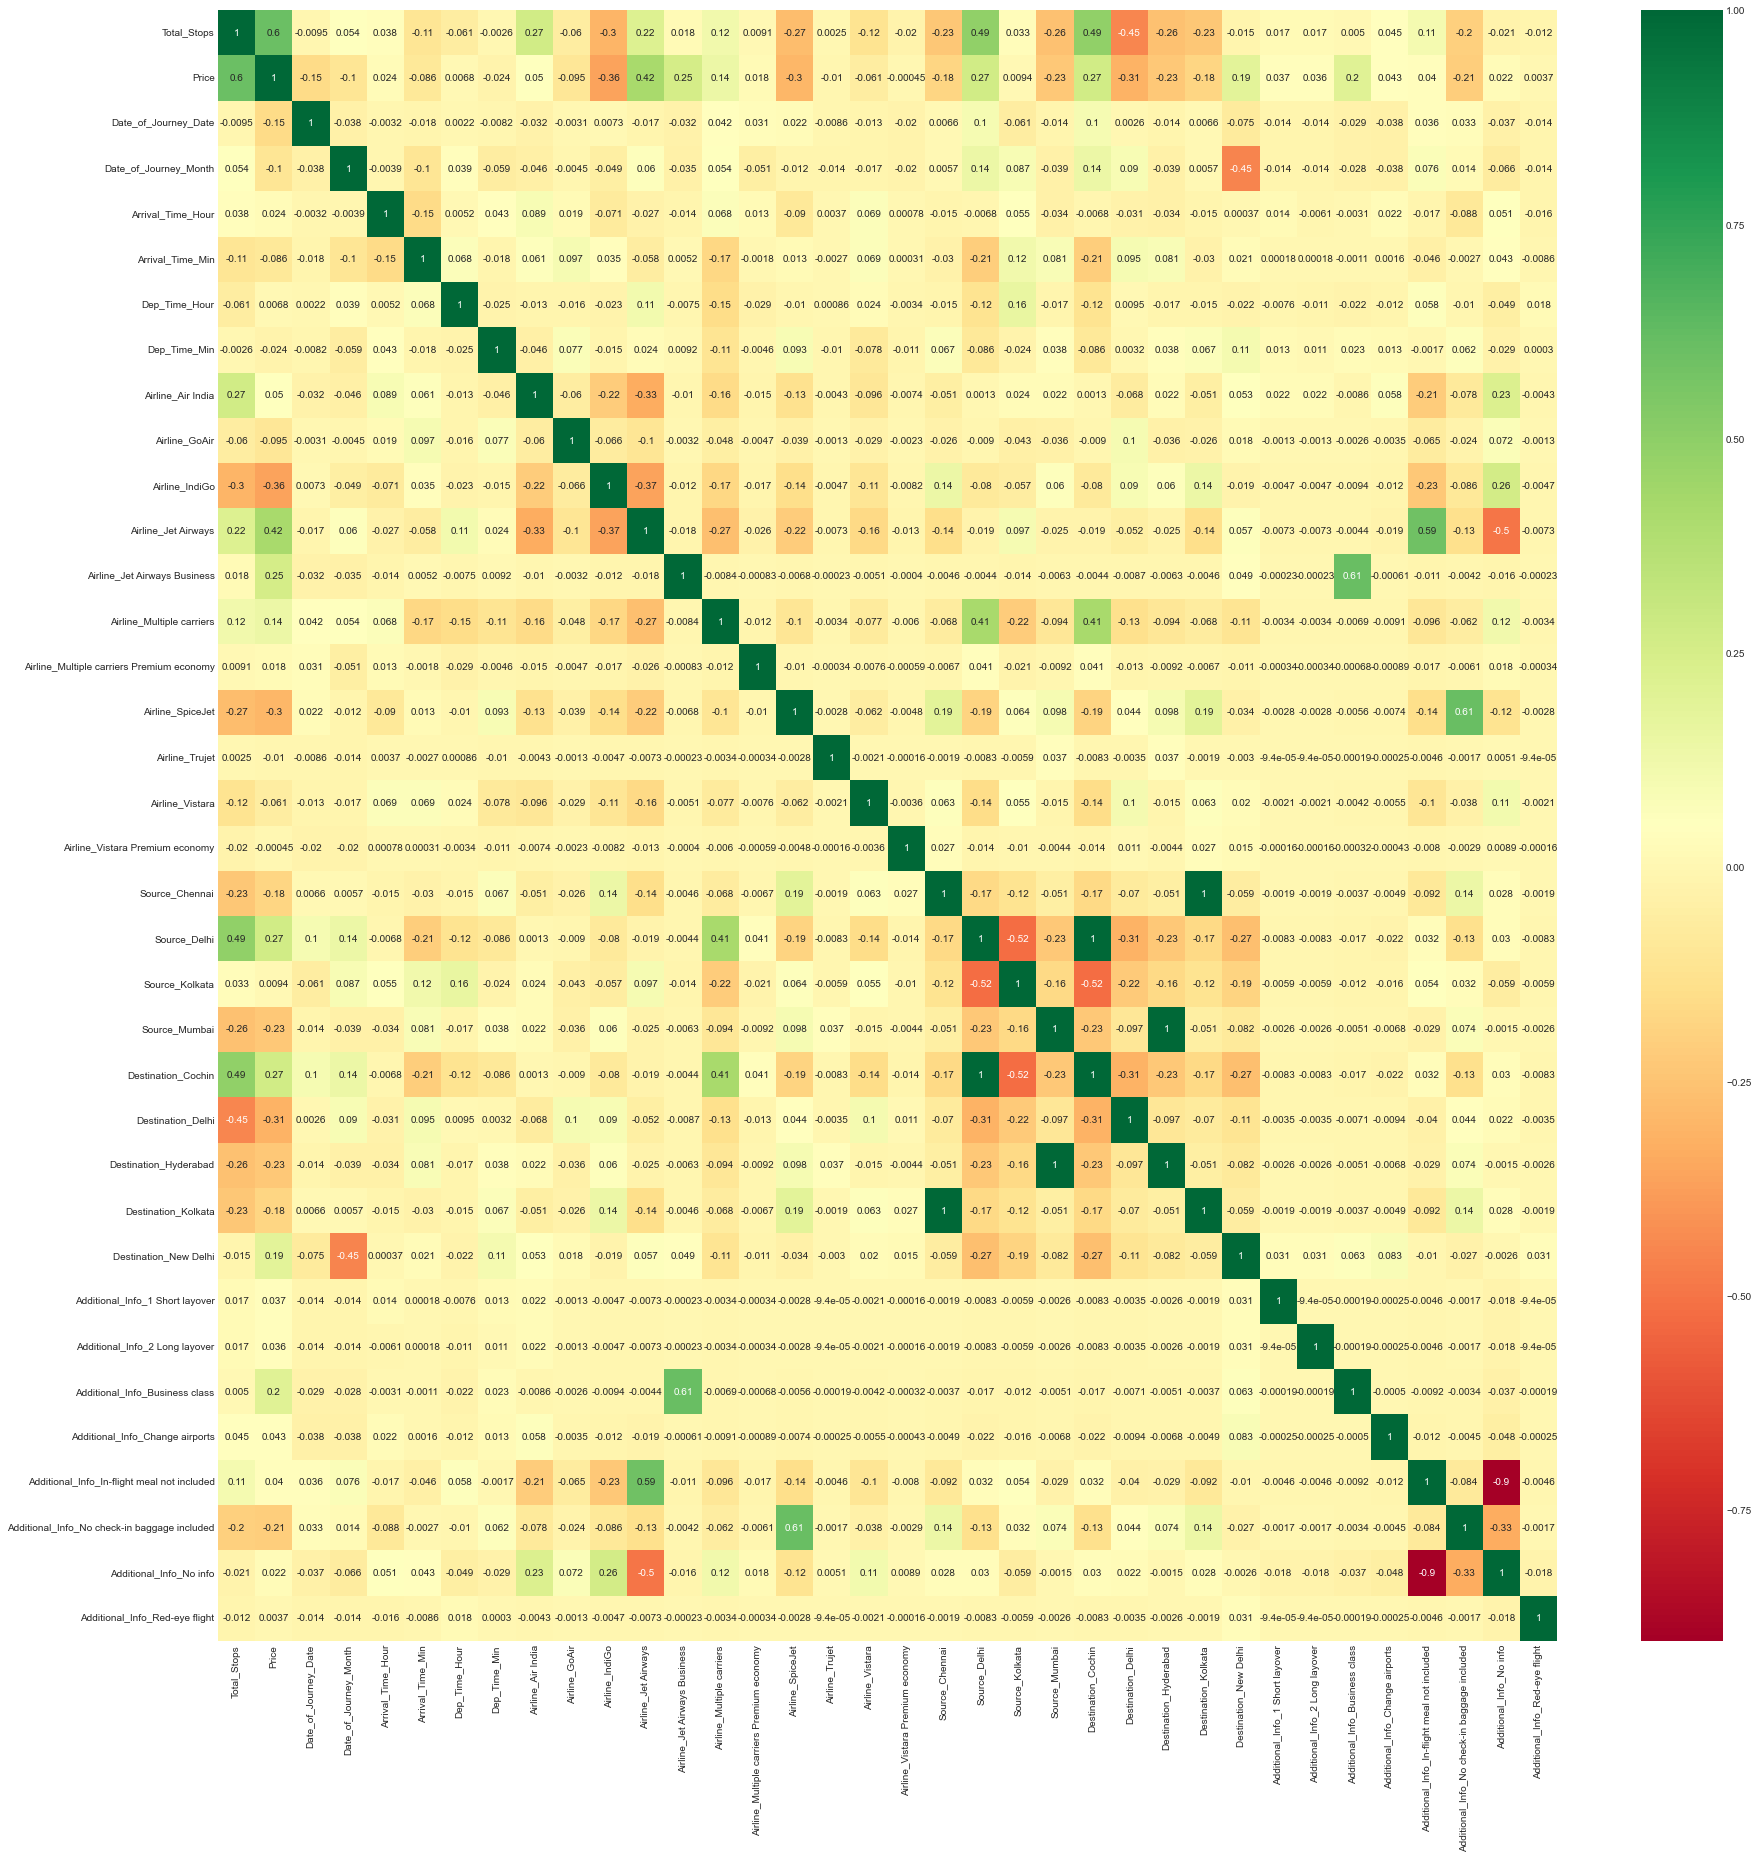

In [68]:
plt.figure(figsize = (30,30))
sns.heatmap(final_df.corr(), annot = True, cmap = "RdYlGn")

plt.savefig("heatmap.png")
plt.show()

Our Correlation Matrix Shows Use A Brief Idea, Now Let's Try To Use Another Way.

In [69]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)
feature_imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns,columns=['Importance'])

In [70]:
feature_imp.sort_values(by='Importance',ascending=False)

,Importance
Total_Stops,2.138266
Additional_Info_No info,1.970211
Arrival_Time_Hour,1.853691
Duration_Hour,1.781488
Source_Delhi,1.550940
Destination_Cochin,1.522696
Arrival_Time_Min,1.506802
Dep_Time_Hour,1.439998
Date_of_Journey_Month,1.250933
Dep_Time_Min,1.231871


We Can See In Our Feature Importance That `Additional Info` Column That We Have Took Has Less Significance Value Compare To Other Parameters So We Will Remove It Completly From The DataSet, Also There Are Some Airline Parameters That Are Also Zero That We Will Measure In Next Step.

In [71]:
### Removing All Additional info Columns
final_df.drop(list(final_df.filter(regex = 'Additional_Info')), axis = 1, inplace = True)

In [72]:
final_df

,Total_Stops,Price,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


In [73]:
X = final_df.drop('Price',axis=1)
y = final_df['Price']

mutual_info_classif(X,y)
feature_imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns,columns=['Feature_Importance'])
feature_imp.sort_values(by='Feature_Importance',ascending=False)

,Feature_Importance
Total_Stops,2.142702
Arrival_Time_Hour,1.836084
Duration_Hour,1.781457
Source_Delhi,1.567715
Destination_Cochin,1.557225
Arrival_Time_Min,1.544940
Dep_Time_Hour,1.439451
Date_of_Journey_Month,1.244649
Dep_Time_Min,1.211836
Duration_Minute,1.089170


[2.20971572e-01 1.43001601e-01 5.39069519e-02 2.79771830e-02
 1.97430644e-02 2.42587145e-02 2.13586163e-02 1.34877339e-01
 1.79327117e-02 9.02012512e-03 2.03339510e-03 1.72036529e-02
 1.36940121e-01 6.73004949e-02 2.03794233e-02 8.89904387e-04
 2.76415742e-03 9.35144773e-05 4.74521450e-03 8.12759797e-05
 4.65649523e-04 1.01059002e-02 3.11864722e-03 6.32826315e-03
 1.04886085e-02 1.29035496e-02 5.40870125e-03 4.05550729e-04
 2.52960973e-02]


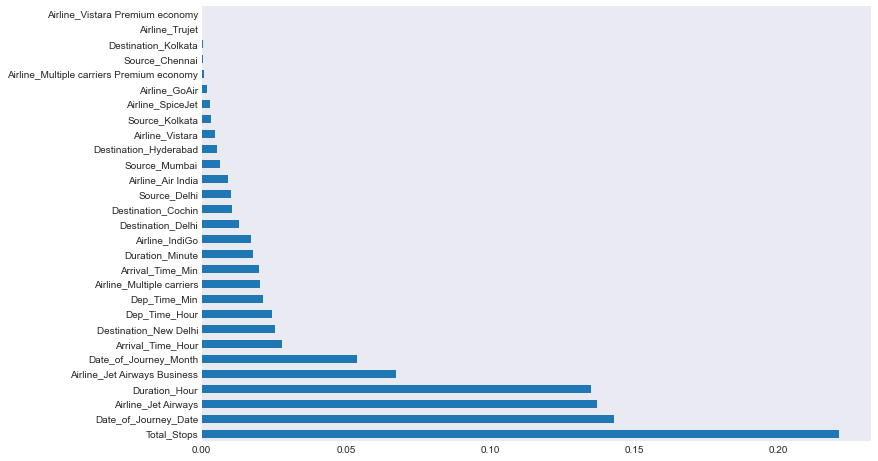

In [74]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

This Time We Have Received A Bit Different Results Like Jet_Airways_Business Has Little Better Importance. The Final Decision Will Be Taken After Modeling.

## STEP 4: Model Training

1. Split The Data Into Training and Validation Sets

2. Scaling The Data if Required By The Model

3. Loading & Fitting The Model On The Training Data

4. Predict Y_test using X_test

5. Calculate MAR, R2 Score, & RMSE Score For Evaluating The Model

6. Plot The Prediction Graph

In [75]:
# St. 1
## spiliting the dataset
from sklearn.model_selection import train_test_split
X = final_df.drop('Price',axis=1)
y = final_df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [76]:
X_train.shape

(8545, 29)

In [77]:
X_test.shape

(2137, 29)

In [78]:
X_train.head()

,Total_Stops,Date_of_Journey_Date,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3725,0,27,5,0,15,22,45,1,30,0,...,0,0,0,0,1,0,0,1,0,0
1251,1,12,5,8,15,6,30,25,45,0,...,0,0,0,1,0,0,0,0,0,0
265,1,21,3,1,35,11,40,13,55,0,...,0,0,1,0,0,1,0,0,0,0
1472,0,21,5,14,45,13,15,1,30,0,...,0,0,0,0,1,0,0,1,0,0
495,1,6,5,9,20,14,5,19,15,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
y_train.head()

3725    1965
1251    8586
265     7695
1472    1965
495     9663
Name: Price, dtype: int32

In [80]:
# St. 2
## We Are Going To Use Ensemble Methods That Doesn't Require Any kind of Scaling

In [ ]:
# St. 3 Loading & Fitting Model On The Data
## 

In [124]:
## St. 5 Evaluating Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scores = {}

def fit_and_evaluate(prediction_model):
    print(f'###### MACHINE LEARNING MODEL : {prediction_model}')
    
    model= prediction_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    

    predictions = model.predict(X_test)
    print("Predictions:\n",predictions)
    
    print('\n')
    
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    r2_scores[f'{prediction_model}'] = r2score
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor

###### MACHINE LEARNING MODEL : KNeighborsRegressor()
Training score: 0.7277984366378423
Predictions:
 [ 7846.  14809.2 12933.2 ...  3197.4  9073.  11232.4]


r2 score is: 0.6459564586691596
MAE:1746.8794571829667
MSE:6817348.272063641
RMSE:2611.005222527071


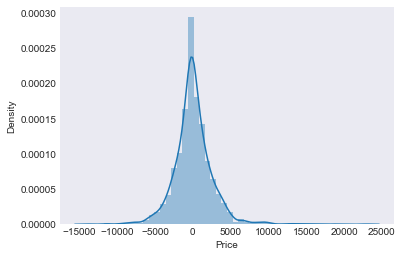

In [126]:
## Fitting Each Model With Base Parameters One By One
fit_and_evaluate(KNeighborsRegressor())

###### MACHINE LEARNING MODEL : DecisionTreeRegressor()
Training score: 0.9700475836916205
Predictions:
 [ 8996. 18550. 14571. ...  3717.  6069. 10262.]


r2 score is: 0.7248143753587655
MAE:1290.6265559195135
MSE:5298885.655681511
RMSE:2301.930853801111


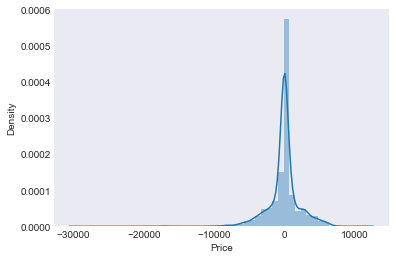

In [127]:
fit_and_evaluate(DecisionTreeRegressor())

###### MACHINE LEARNING MODEL : RandomForestRegressor()
Training score: 0.9531805989832591
Predictions:
 [ 8421.482      17032.25333333 13787.78333333 ...  3832.07
  5645.55       10627.02      ]


r2 score is: 0.837779733905807
MAE:1113.3858797185242
MSE:3123661.136689167
RMSE:1767.3882246663202


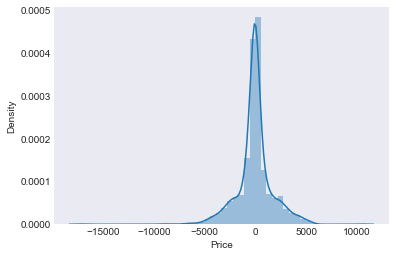

In [131]:
fit_and_evaluate(RandomForestRegressor())

###### MACHINE LEARNING MODEL : GradientBoostingRegressor()
Training score: 0.7777315541646607
Predictions:
 [ 5801.97949533 16162.82659005 11933.42742674 ...  5276.66983993
  6408.32394721 11763.11830803]


r2 score is: 0.7964494275285774
MAE:1470.5342730094508
MSE:3919504.1895112214
RMSE:1979.7737723061243


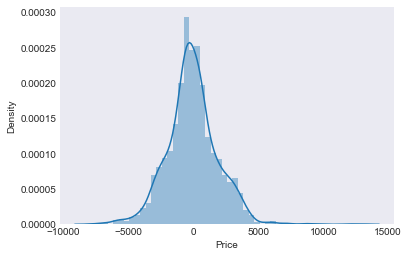

In [169]:
fit_and_evaluate(GradientBoostingRegressor())

###### MACHINE LEARNING MODEL : ExtraTreesRegressor()
Training score: 0.9700472060823933
Predictions:
 [ 8976.48 17454.37 14571.   ...  3758.4   5831.41 10354.19]


r2 score is: 0.7989874572162986
MAE:1180.006427390423
MSE:3870632.708221116
RMSE:1967.3923625502657


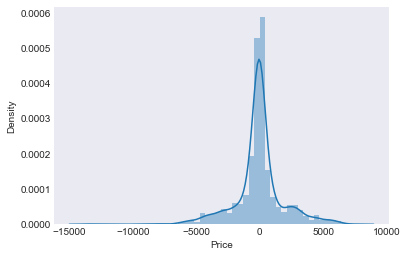

In [172]:
fit_and_evaluate(ExtraTreesRegressor())

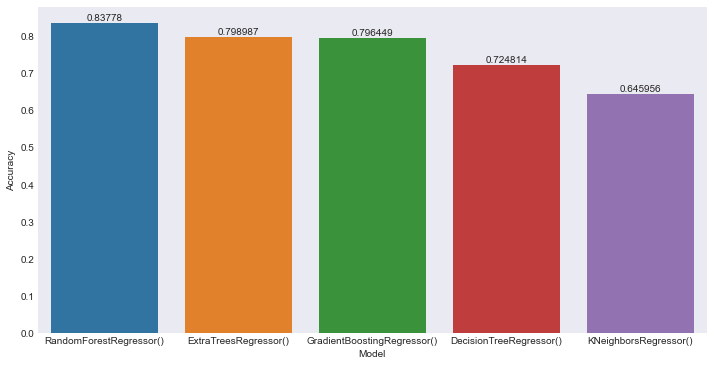

In [173]:
## Comparing Different R2 Scores
plt.figure(figsize=(12,6))
scores = pd.DataFrame(r2_scores.items(),columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values("Accuracy", ascending = False),x='Model',y='Accuracy')
ax.bar_label(ax.containers[0]);

The Best Model Is `RandomForestRegressor()`, Let's Try To Increase Its Accuracy Using `Hyper parameter Tuning`.

#### Hyper Parameter Tuning
1. Randomized Search CV

In [177]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
## PARAMETERS
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 20)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth =  [int(x) for x in np.linspace(start = 10, stop = 25, num = 8)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7,15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [234]:
param_grid

{'n_estimators': [100,
  121,
  142,
  163,
  184,
  205,
  226,
  247,
  268,
  289,
  310,
  331,
  352,
  373,
  394,
  415,
  436,
  457,
  478,
  500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 12, 14, 16, 18, 20, 22, 25, None],
 'min_samples_split': [2, 5, 7, 15],
 'min_samples_leaf': [1, 2, 4, 10],
 'bootstrap': [True, False]}

In [235]:
rfr=RandomForestRegressor()
rfr_tuned=RandomizedSearchCV(estimator=rfr,
                             param_distributions=param_grid,
                             cv=4,
                             verbose=2, ## Print Amount of Message (The Higher The Number The More Message Gets Printed)
                             n_jobs=-1,
                             scoring='neg_mean_squared_error',
                             n_iter = 10,
                            random_state=42)

In [236]:
## Fitting or Training The Model
rfr_tuned.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.9s finished


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 14, 16, 18, 20,
                                                      22, 25, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 7, 15],
                                        'n_estimators': [100, 121, 142, 163,
                                                         184, 205, 226, 247,
                                                         268, 289, 310, 331,
                                                         352, 373, 394, 415,
                                                         436, 457, 478, 500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [237]:
## Best Parameters
rfr_tuned.best_params_

{'n_estimators': 331,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [238]:
## Best Parameters
pred = rfr_tuned.predict(X_test)

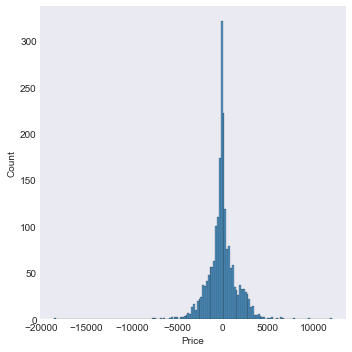

In [239]:
sns.displot(y_test-pred)

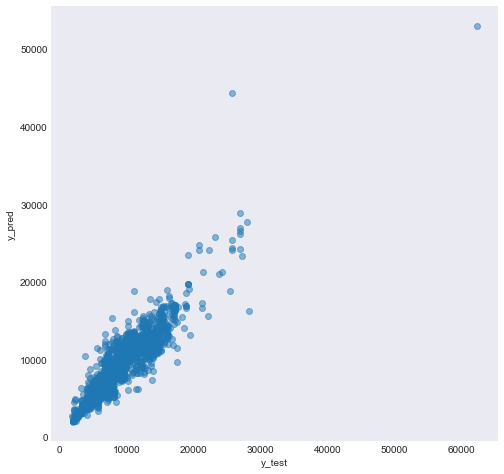

In [240]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [241]:
r2_score(y_test,pred)

0.8624978847736444

In [242]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 1073.2136615193972
MSE: 2647696.393838536
RMSE: 1627.1743587699925


In [247]:
## Save The Model
import pickle 
pickle.dump(rfr_tuned, open('predict_flight_fare_V3_86.pkl', 'wb'))

In [249]:
loaded_model = pickle.load(open("predict_flight_fare_V3_86.pkl", "rb"))
pred = loaded_model.predict(X_test)
r2_score(y_test,pred)

0.8624978847736444

### Hyper Parameter Tuning Details-
```
First Iteration With Some Parameter  : 0.848079685690615
MAE: 1086.59 MSE: 2925328.586 RMSE: 1710.35

Second Iteration With Change In Parameter(change in n_estimator range) : 0.8504176918461204
MAE: 1163.69 MSE: 2880308.69 RMSE: 1697.14

Third Iteration With Some Other Changes In Parameter (increased n_estimator range from 10 to 20) : 0.8624978847736444 
MAE: 1073.21 MSE: 2647696.39 RMSE:1627.17
```

## Test Data

In [304]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [305]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [306]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [308]:
##  Dropping Columns (Route,Additional_Info)
df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

## Handling Categorical Columns(Airline, Total_Stops,Source,Destination)
## Airline
Airline = df_test[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)

## Source
Source = df_test[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)

## Destination
Destination = df_test[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)

## Total_Stops
df_test['Total_Stops']=df_test['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}).astype(int)

## Handling Datetime Object Columns (Arrival_Time, Dep_Time)

## Convert and Extract Day & Month
def extract_day_and_month(data,col):
    data[col]=pd.to_datetime(data[col])
    data[col+'_Day'] = data[col].dt.day
    data[col+'_Month'] = data[col].dt.month
    
## Convert and Extract Hour & Minute
def extract_hour_and_minute(data,col):
    data[col]=pd.to_datetime(data[col])
    data[col+'_Hour']=data[col].dt.hour
    data[col+'_Min']=data[col].dt.minute

def handle_single_duration_data(df,col):
    for i in range(len(df[col])):
        if 'h' not in df[col][i]:
            df[col][i] = "0h "+str(df[col][i])
        elif 'm' not in df[col][i]:
            df[col][i] = str(df[col][i])+" 0m"



def extract_hour_from_duration(val):
    return val.split(' ')[0][0:-1]

def extract_minutes_from_duration(val):
    return val.split(' ')[1][0:-1]


## Date_of_Journey
extract_day_and_month(df_test,'Date_of_Journey')

## Arrival Time
extract_hour_and_minute(df_test,'Arrival_Time')

## Dep Time
extract_hour_and_minute(df_test,'Dep_Time')

## Duration
handle_single_duration_data(df_test,'Duration')
df_test['Duration_Hour'] = df_test['Duration'].apply(extract_hour_from_duration)
df_test['Duration_Minute'] = df_test['Duration'].apply(extract_minutes_from_duration)



df_test.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Duration','Airline','Destination','Source'], axis=1, inplace=True)
df_test = pd.concat([df_test,Airline,Source,Destination],axis=1)
df_test.head()

,Total_Stops,Date_of_Journey_Day,Date_of_Journey_Month,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [309]:
df_test.shape

(2671, 28)

In [310]:
df_test.columns

Index(['Total_Stops', 'Date_of_Journey_Day', 'Date_of_Journey_Month',
       'Arrival_Time_Hour', 'Arrival_Time_Min', 'Dep_Time_Hour',
       'Dep_Time_Min', 'Duration_Hour', 'Duration_Minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [311]:
X_train.columns

Index(['Total_Stops', 'Date_of_Journey_Date', 'Date_of_Journey_Month',
       'Arrival_Time_Hour', 'Arrival_Time_Min', 'Dep_Time_Hour',
       'Dep_Time_Min', 'Duration_Hour', 'Duration_Minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [312]:
X_train.shape,df_test.shape

((8545, 29), (2671, 28))

There Is a Problem with shape of X_train and New Test Data. (They Are Different 29,28) There Must Be Some Value That Is Missing From The Data. 

In [315]:
Airline.T

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Airline_Air India,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
Airline_GoAir,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Airline_IndiGo,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
Airline_Jet Airways,1,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
Airline_Jet Airways Business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airline_Multiple carriers,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Airline_Multiple carriers Premium economy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airline_SpiceJet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Airline_Vistara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Airline_Vistara Premium economy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


`Airline` Only has 10 categories, It is short by 1 Category that is `Airline_Trujet`. What We Can Do is Add a New Column With All Row Values As 0.

In [317]:
Airline_Trujet = [i*0 for i in range(len(df_test))]
df_test['Airline_Trujet'] = Airline_Trujet

In [318]:
X_train.shape,df_test.shape

((8545, 29), (2671, 29))

In [320]:
test_predictions = loaded_model.predict(df_test)

TypeError: Index(...) must be called with a collection of some kind, 'Price' was passed

In [326]:
test_predictions = test_predictions.astype(int)

In [328]:
test_predictions_df = pd.DataFrame({'Price': test_predictions})
test_predictions_df

,Price
0,15668
1,4646
2,17064
3,10992
4,3996
...,...
2666,10032
2667,4396
2668,16190
2669,9234


In [331]:
test_predictions_df.to_csv('Test_Set_Submissions.csv',index=False)

### FUTURE WORK

* Improve The Accuracy By Using Some Other Hyper parameter Technique Like Bayesian optimization.
* Try To Split The Data Into 90-10 or 70-30 and see if accuracy changes.
* Try To Apply Hyper parameter tuning on Extra Tree Regressor and GB See Whether Performance Increase or Not.
* Try To Add Some Other Efficient models Like LightBGM and Catboost.

### VOTE

* Give Notebook a Upvote 🙌 if You Found It Useful.

### CONNECT WITH ME

[LinkedIN](https://www.linkedin.com/in/abhayparashar31/) | [Medium](https://medium.com/@abhayparashar31) | [Twitter](https://twitter.com/abhayparashar31) | [Github](https://github.com/Abhayparashar31)

#### HOPE TO SEE YOU IN MY NEXT KAGGLE NOTEBOOK 😀,